In [1]:
#para operações básicas
import pandas as pd
import numpy as np

#para visualização
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import brewer2mpl

#para trabalhar com texto
import nltk
from nltk.text import Text
from nltk import bigrams
from nltk import trigrams

In [2]:
df = pd.read_csv('lana_lyrics_clean.csv')

In [3]:
df.head()

,album,title,lyrics,lyrics_str
0,Blue Banisters,Text Book,"['guess', 'could', 'call', 'textbook', 'lookin...",guess could call textbook lookin father wanted...
1,Blue Banisters,Blue Banisters,"['there', 'picture', 'wall', 'john', 'deere', ...",there picture wall john deere jenny handed bee...
2,Blue Banisters,Arcadia,"['body', 'map', 'la', 'stand', 'straight', 'li...",body map la stand straight like angel halo han...
3,Blue Banisters,Black Bathing Suit,"['grenadine', 'quarantine', 'like', 'lot', 'la...",grenadine quarantine like lot la hey zoom targ...
4,Blue Banisters,If You Lie Down with Me,"['put', 'red', 'boot', 'baby', 'giddy', 'baby'...",put red boot baby giddy baby want dance baby g...


In [4]:
df['lyrics'] = df['lyrics'].apply(eval)

## Frequência de termos 

In [5]:
lemmas = []

In [6]:
def lemma(df_series, lista):
 for sentence in df_series:
  for word in sentence:
    lista.append(word) 

In [7]:
lemma(df['lyrics'], lemmas)

In [8]:
frequency = nltk.FreqDist(lemmas)

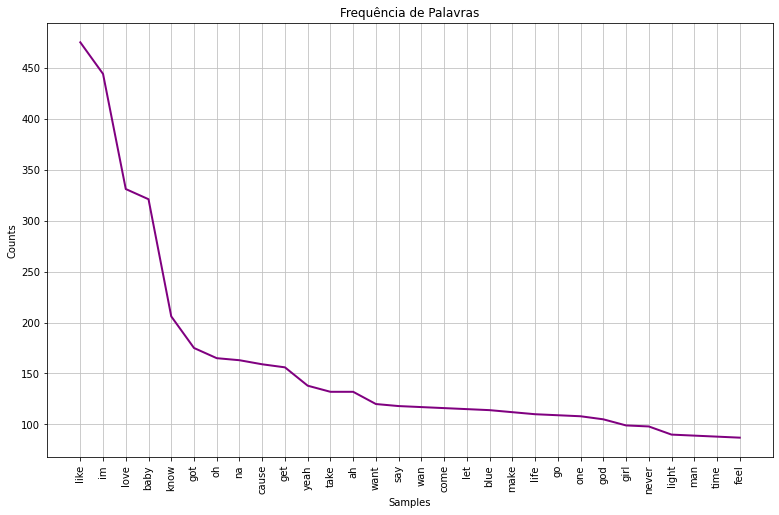

<AxesSubplot:title={'center':'Frequência de Palavras'}, xlabel='Samples', ylabel='Counts'>

In [54]:
plt.figure(figsize = (13, 8))
frequency.plot(30, title = "Frequência de Palavras", color = "purple")

## WordClouds

In [10]:
def WordNuvem(df_series, album): 
    '''
    Concatena todos os textos do DataSeries e produz um WordCloud dos resultados
    '''
    text = df_series.sum()
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='black', width = 500, height = 300).generate(text)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Wordcloud do {album}', fontsize = 22)
    plt.show()

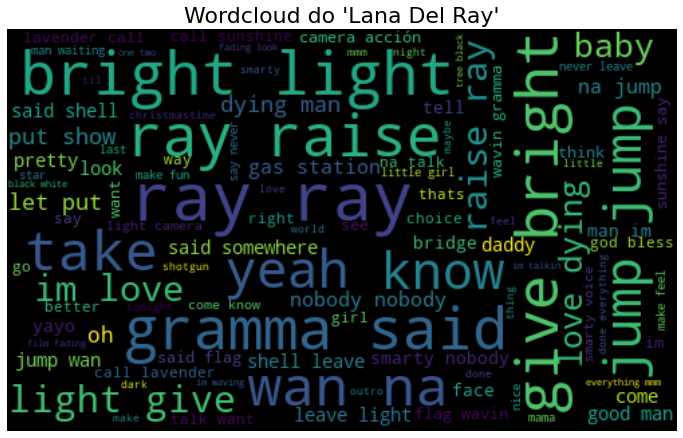

In [11]:
WordNuvem(df[df['album'] == 'Lana Del Ray']['lyrics_str'],"'Lana Del Ray'")

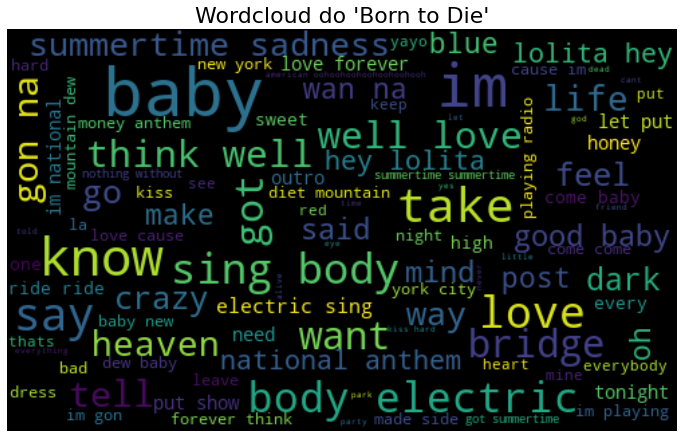

In [12]:
WordNuvem(df[df['album'] == 'Born to Die - The Paradise Edition']['lyrics_str'],"'Born to Die'")

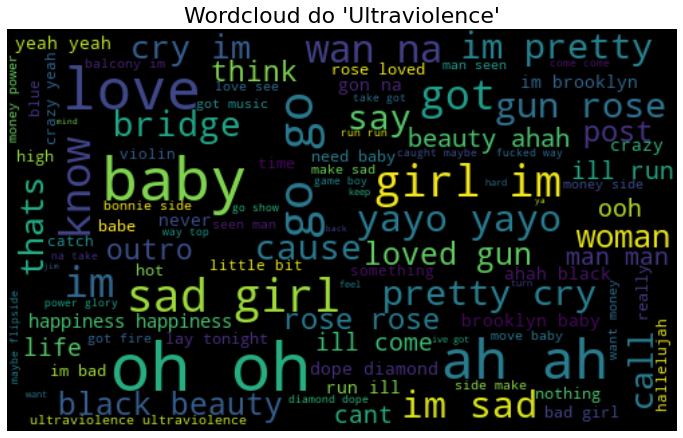

In [13]:
WordNuvem(df[df['album'] == 'Ultraviolence (Deluxe Edition)']['lyrics_str'],"'Ultraviolence'")

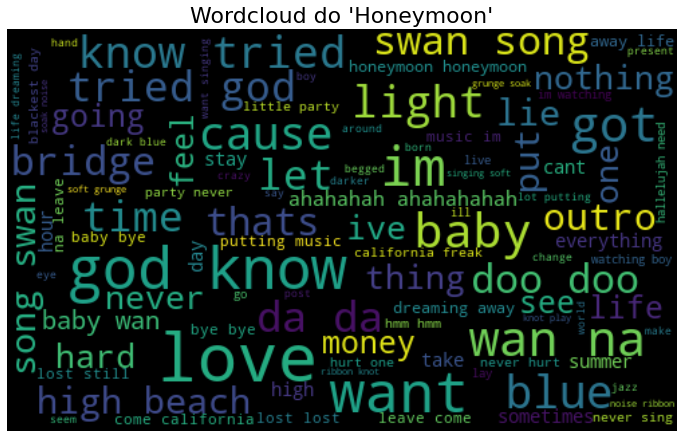

In [14]:
WordNuvem(df[df['album'] == 'Honeymoon']['lyrics_str'],"'Honeymoon'")

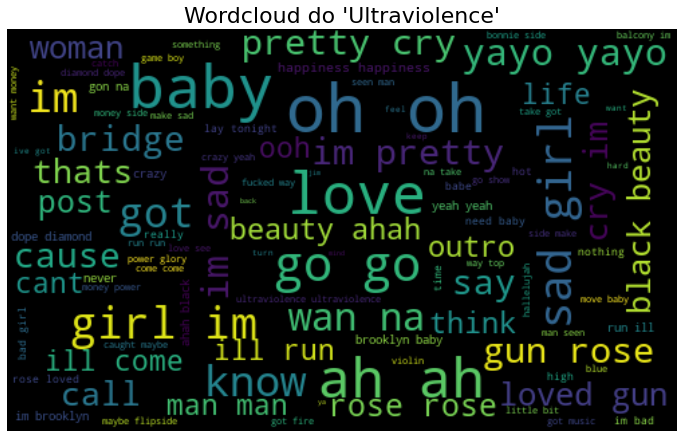

In [15]:
WordNuvem(df[df['album'] == 'Ultraviolence (Deluxe Edition)']['lyrics_str'],"'Ultraviolence'")

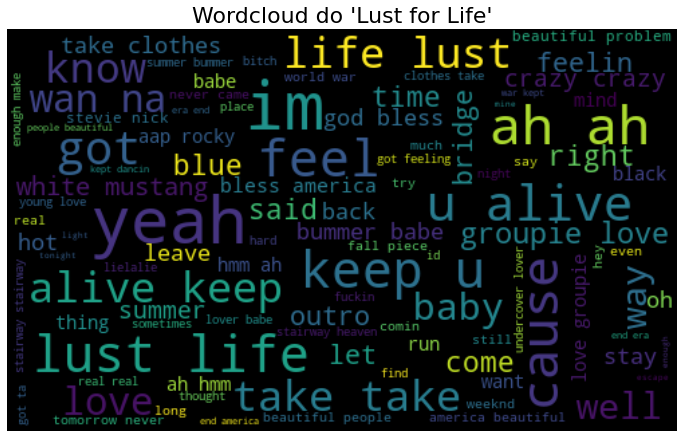

In [16]:
WordNuvem(df[df['album'] == 'Lust for Life']['lyrics_str'],"'Lust for Life'")

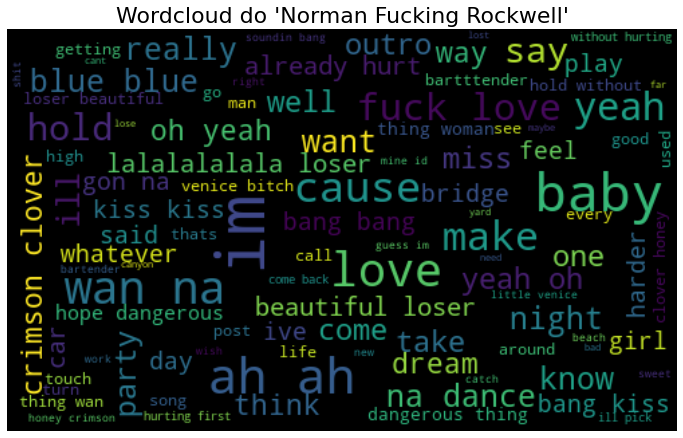

In [17]:
WordNuvem(df[df['album'] == 'Norman Fucking Rockwell!']['lyrics_str'],"'Norman Fucking Rockwell'")

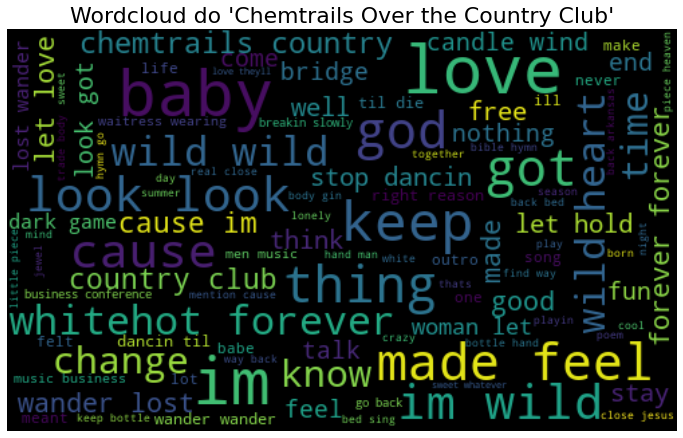

In [18]:
WordNuvem(df[df['album'] == 'Chemtrails Over the Country Club']['lyrics_str'],"'Chemtrails Over the Country Club'")

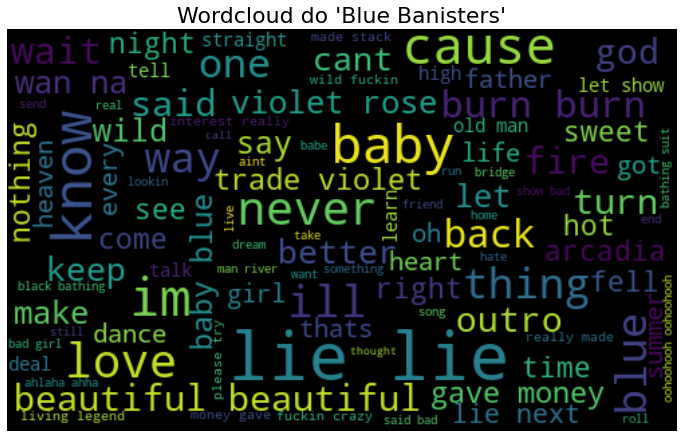

In [19]:
WordNuvem(df[df['album'] == 'Blue Banisters']['lyrics_str'],"'Blue Banisters'")

## N-gramas

In [20]:
bigramas = []
trigramas = []

In [21]:
def ngrams(lista, ngram, size, df_series):
  for i in df.index:
    if len(df_series[i]) > size:
      lista.append([item for item in ngram(df_series[i])])
    else:
      lista.append([])

In [22]:
ngrams(bigramas, bigrams, 2, df['lyrics'])
ngrams(trigramas, trigrams, 3, df['lyrics'])

In [23]:
bigrams_list = []
for sentence in bigramas:
  for bigrama in sentence:
    bigrams_list.append(bigrama)

bigrams_series = (pd.Series(bigrams_list).value_counts())

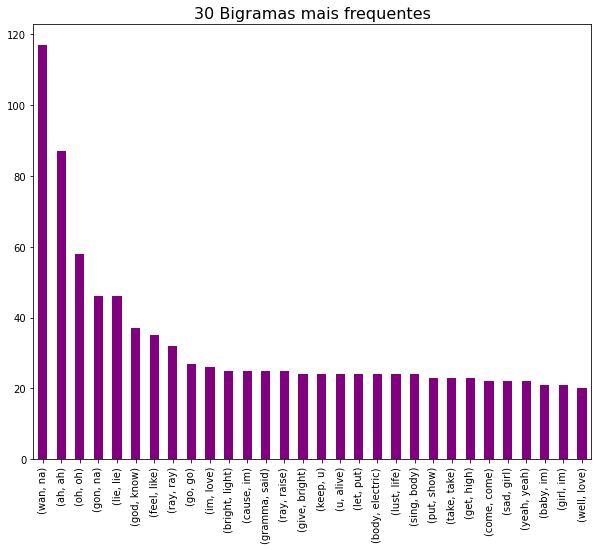

In [24]:
bigrams_series[:30].plot.bar(figsize=(10,8), color = 'purple')
plt.title('30 Bigramas mais frequentes', fontsize = 16)
plt.show()

In [25]:
trigrams_list = []
for sentence in trigramas:
  for trigrama in sentence:
    trigrams_list.append(trigrama)

trigrams_series = (pd.Series(trigrams_list).value_counts())

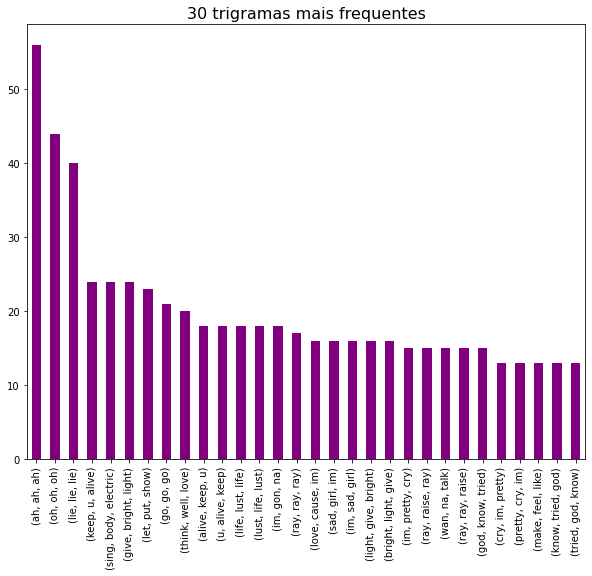

In [26]:
trigrams_series[:30].plot.bar(figsize=(10,8), color = 'purple')
plt.title('30 trigramas mais frequentes', fontsize = 16)
plt.show()

## Vocabulário

In [29]:
def lexical_diversity(texto):
  return len(set(texto)) / len(texto)

In [33]:
lexico_ldr = lexical_diversity(' '.join(df[df['album'] == 'Lana Del Ray']['lyrics_str']).split())
lexico_btd = lexical_diversity(' '.join(df[df['album'] == 'Born to Die - The Paradise Edition']['lyrics_str']).split())
lexico_ultra = lexical_diversity(' '.join(df[df['album'] == 'Ultraviolence (Deluxe Edition)']['lyrics_str']).split())
lexico_hm = lexical_diversity(' '.join(df[df['album'] == 'Honeymoon']['lyrics_str']).split())
lexico_lfl = lexical_diversity(' '.join(df[df['album'] == 'Lust for Life']['lyrics_str']).split())
lexico_nfk = lexical_diversity(' '.join(df[df['album'] == 'Norman Fucking Rockwell!']['lyrics_str']).split())
lexico_cotcc = lexical_diversity(' '.join(df[df['album'] == 'Chemtrails Over the Country Club']['lyrics_str']).split())
lexico_bb = lexical_diversity(' '.join(df[df['album'] == 'Blue Banisters']['lyrics_str']).split())

In [52]:
bmap = brewer2mpl.get_map('Set2','qualitative',8,reverse=True)
colors = bmap.mpl_colors

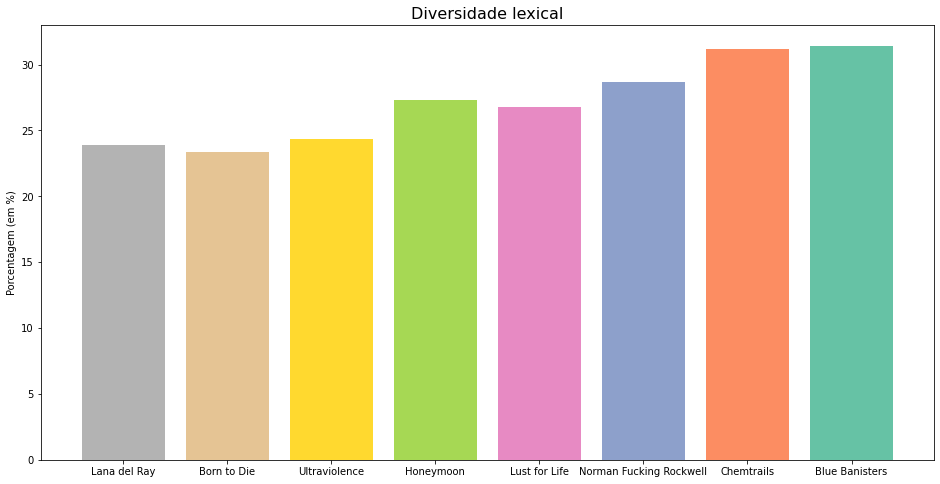

In [53]:
plt.figure(figsize = (16,8))
plt.bar(['Lana del Ray', 'Born to Die', 'Ultraviolence', 'Honeymoon', 'Lust for Life', 'Norman Fucking Rockwell', 'Chemtrails', 'Blue Banisters'], 
[lexico_ldr*100, lexico_btd*100, lexico_ultra*100, lexico_hm*100, lexico_lfl*100, lexico_nfk*100, lexico_cotcc*100, lexico_bb*100], color = colors)
plt.title('Diversidade lexical', fontsize = 16)
plt.ylabel('Porcentagem (em %)')
plt.show()